In [1]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv", names=["Age","Experience","Rank","Nationality","Go"],delimiter=";")
#nombres de las columnas y el delimitador
print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [2]:
#convertimos atributos en letra por numeros
d = {'UK': 0, 'USA': 1, 'N': 2}#donde uk po 0, donde usa pon 1
df['Nationality'] = df['Nationality'].map(d)#corregimos la columna
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)


    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [3]:
features = ['Age', 'Experience', 'Rank', 'Nationality']
#separamos las columnas, la que quiero predecir
X = df[features]
y = df['Go']

print(X)
print(y)


    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


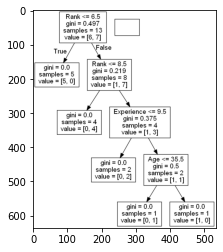

In [4]:
dtree = DecisionTreeClassifier()#creo el arbol
dtree = dtree.fit(X, y)#ajusto las x e y
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)#le paso el arbol,no guardarlo, las columnas
graph = pydotplus.graph_from_dot_data(data)#hago el grafo
graph.write_png('mydecisiontree.png')#crea la imagen
img=pltimg.imread('mydecisiontree.png')#leo
imgplot = plt.imshow(img)#muestro
plt.show()

In [5]:
print(dtree.predict([[40, 10, 7, 1]]))#hago predicion para uno que tenga esos años,experiencia, me saca 0-1

[1]


c:\Users\chema\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [6]:
print(dtree.predict([[40, 10, 6, 1]]))

[0]


c:\Users\chema\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
